In [22]:
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

In [23]:
order= pd.read_csv('order.csv', delimiter=',')

In [24]:
order

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,
...,...,...,...,...,...,...
6466,46334,11362,YZ,70641225,4780.0,SIPO
6467,46335,11362,MN,78507822,56.0,
6468,46336,11362,ST,40799850,330.0,POJISTNE
6469,46337,11362,KL,20009470,129.0,


In [25]:
order['k_symbol'].replace('POJISTNE','ins_paymt',inplace=True)
order['k_symbol'].replace('SIPO','household',inplace=True)
order['k_symbol'].replace('LEASING','leasing',inplace=True)
order['k_symbol'].replace('UVER','loan_payt',inplace=True)
order['k_symbol'].replace(' ','unknow',inplace=True)
order = order.rename(columns = {"amount":"order_amount","k_symbol":"order_category"})

In [26]:
order['bank_to'].value_counts()

QR    531
YZ    521
AB    519
WX    515
ST    511
KL    500
UV    499
IJ    496
GH    487
OP    485
EF    483
MN    466
CD    458
Name: bank_to, dtype: int64

In [27]:
order

,order_id,account_id,bank_to,account_to,order_amount,order_category
0,29401,1,YZ,87144583,2452.0,household
1,29402,2,ST,89597016,3372.7,loan_payt
2,29403,2,QR,13943797,7266.0,household
3,29404,3,WX,83084338,1135.0,household
4,29405,3,CD,24485939,327.0,unknow
...,...,...,...,...,...,...
6466,46334,11362,YZ,70641225,4780.0,household
6467,46335,11362,MN,78507822,56.0,unknow
6468,46336,11362,ST,40799850,330.0,ins_paymt
6469,46337,11362,KL,20009470,129.0,unknow


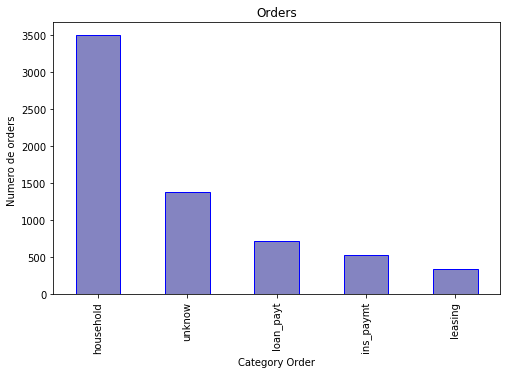

In [28]:
en_order= np.arange(len(order['account_id']))
plt.rcParams['figure.figsize']=(8,5)
plt.title('Orders',fontsize='15')
plt.ylabel('Numero de orders ',fontsize='15')
plt.xlabel('Category Order',fontsize='15')

order['order_category'].value_counts().plot(kind='bar', color =(0.2,0.2,0.6,0.6), edgecolor ='blue')

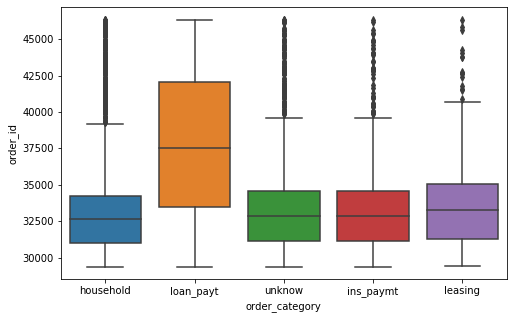

In [29]:
sns.boxplot(x=order["order_category"],y=order["order_id"])

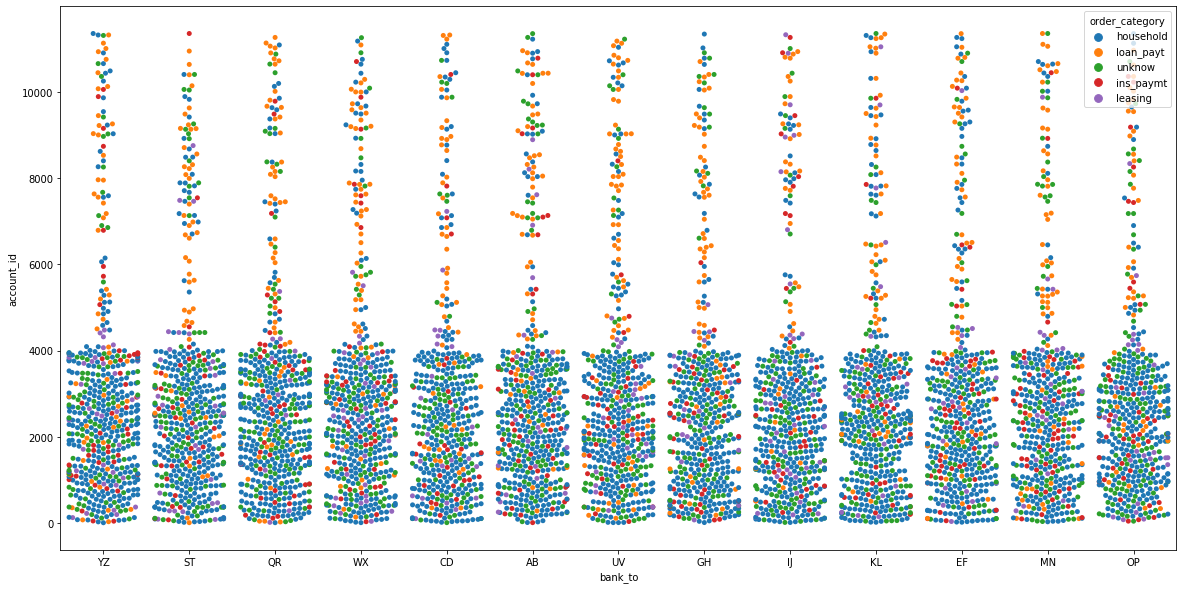

In [30]:
plt.rcParams['figure.figsize'] = (20,10)
sns.swarmplot(x=order['bank_to'],y=order['account_id'],hue=order['order_category'])